<a href="https://colab.research.google.com/github/NervOUs11/Cat_or_Dog/blob/main/CatVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [42]:
#Load dataset from tensorflow
(data_train, data_test), data_info = tfds.load("cats_vs_dogs",
                       split=['train[:80%]', 'train[80%:]'],
                       as_supervised=True,
                       with_info=True,
                       shuffle_files=True)

In [43]:
#Show info
data_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [44]:
for images, labels in data_train:
    x_train = images.numpy()
    y_train = labels.numpy()

In [45]:
x_train

array([[[149, 129, 102],
        [149, 129, 102],
        [149, 129, 102],
        ...,
        [115,  98,  70],
        [113,  96,  68],
        [112,  95,  67]],

       [[149, 129, 102],
        [149, 129, 102],
        [149, 129, 102],
        ...,
        [114,  97,  69],
        [113,  96,  68],
        [112,  95,  67]],

       [[149, 129, 102],
        [149, 129, 102],
        [149, 129, 102],
        ...,
        [114,  97,  69],
        [113,  96,  68],
        [112,  95,  67]],

       ...,

       [[ 70,  45,  38],
        [ 69,  44,  37],
        [ 71,  46,  39],
        ...,
        [ 48,  42,  28],
        [ 50,  44,  30],
        [ 51,  45,  31]],

       [[ 70,  45,  38],
        [ 69,  44,  37],
        [ 71,  46,  39],
        ...,
        [ 48,  42,  28],
        [ 50,  44,  30],
        [ 52,  46,  32]],

       [[ 70,  46,  36],
        [ 69,  45,  35],
        [ 71,  47,  37],
        ...,
        [ 49,  43,  29],
        [ 50,  44,  30],
        [ 52,  46,  32]]

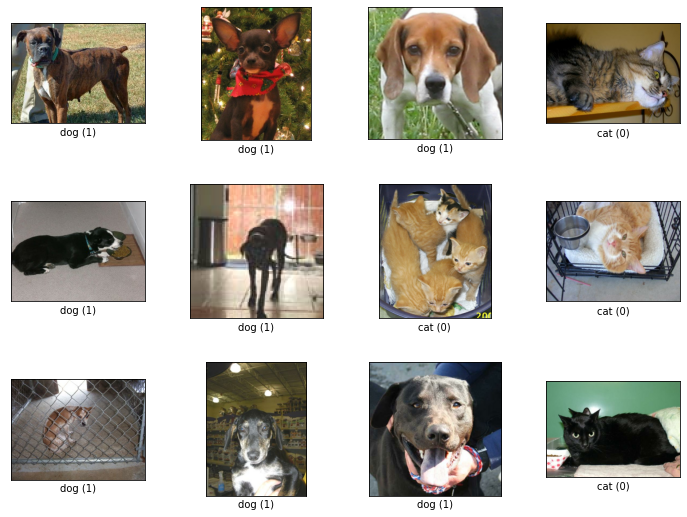

In [46]:
#Show example image
show = tfds.show_examples(data_train, data_info, rows=3, cols=4)

In [49]:
# Resize image
AUTO = tf.data.experimental.AUTOTUNE
def resize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = tf.image.resize(image, (256, 256))  
    return (image, label)

data_train = data_train.map(resize_image).prefetch(AUTO)

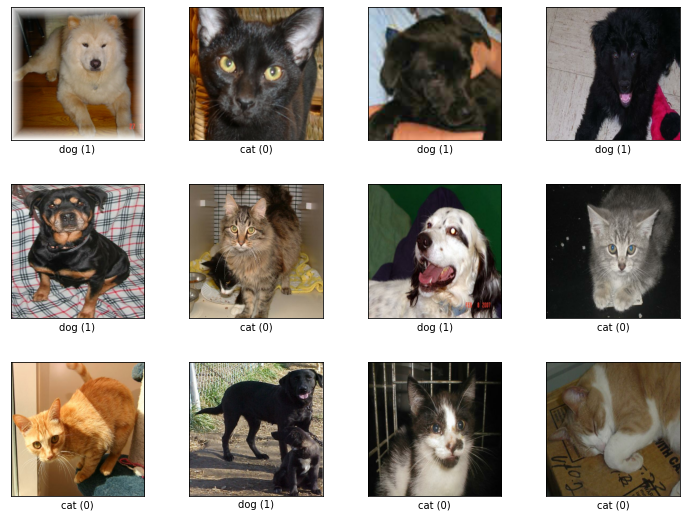

In [50]:
# show image
show = tfds.show_examples(data_train, data_info, rows=3, cols=4)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D 

# Build model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (256,256,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256, 256, 32)      128       
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=10)

In [ ]:
# Test model

In [ ]:
# Upload new image file to the model